In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


## Figure 3.1
**Trade-off between RMSE and runtime for ACE models**

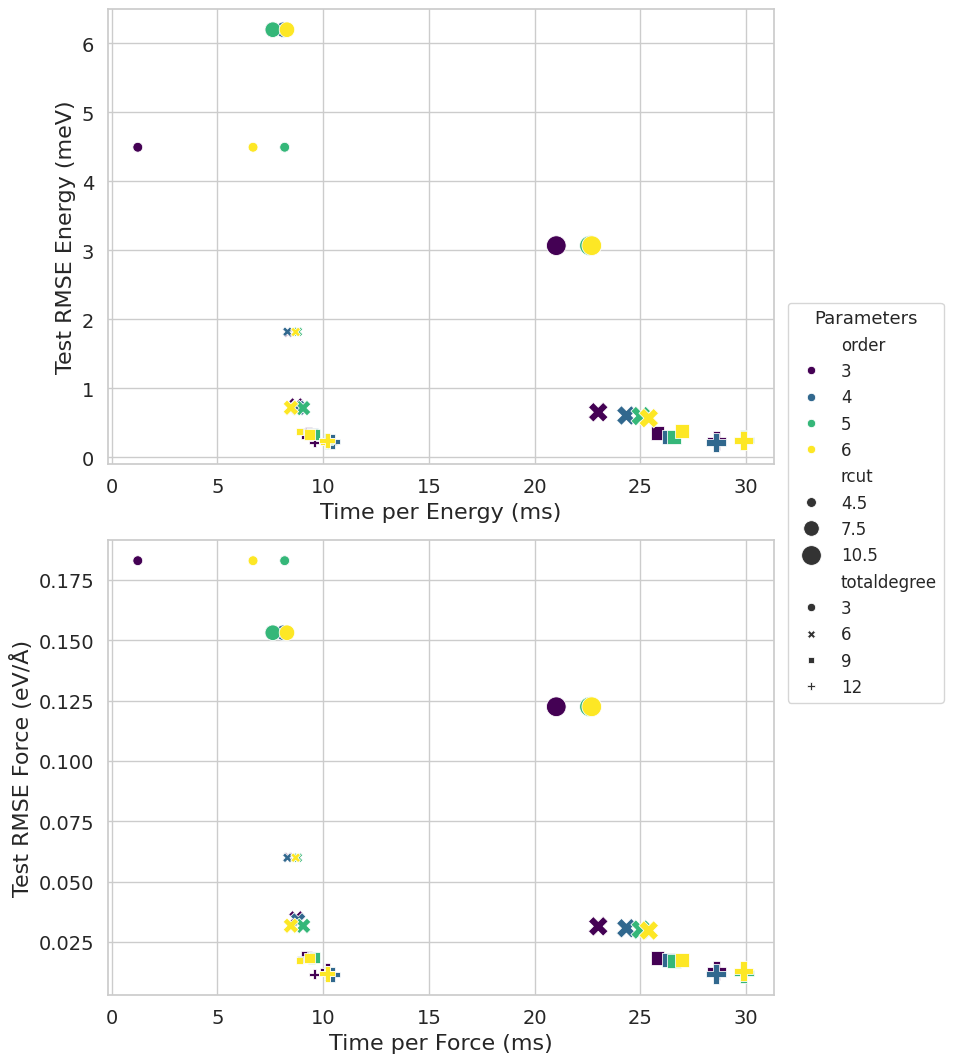

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
file_path = "resultsmix_RRQR.csv"
df = pd.read_csv(file_path)

# Set style
sns.set(style="whitegrid", context="notebook")

# ----------------------------
# RMSE Plots: Energy (top), Force (bottom) with one shared legend
# ----------------------------
fig, axes = plt.subplots(2, 1, figsize=(8, 12))  # 2 rows, 1 column

# Use the SAME palette for both plots
palette = "viridis"

# Energy RMSE
sns.scatterplot(data=df, x="time_per_force_ms", y="test_rmse_E",
                hue="order", style="totaldegree", size="rcut",
                sizes=(50,200), palette=palette, ax=axes[0])
axes[0].set_xlabel("Time per Energy (ms)", fontsize=16)
axes[0].set_ylabel("Test RMSE Energy (meV)", fontsize=16)
axes[0].tick_params(axis='both', which='major', labelsize=14)

# Force RMSE
sns.scatterplot(data=df, x="time_per_force_ms", y="test_rmse_F",
                hue="order", style="totaldegree", size="rcut",
                sizes=(50,200), palette=palette, ax=axes[1])
axes[1].set_xlabel("Time per Force (ms)", fontsize=16)
axes[1].set_ylabel("Test RMSE Force (eV/Å)", fontsize=16)
axes[1].tick_params(axis='both', which='major', labelsize=14)

# Remove individual legends
axes[0].legend_.remove()
axes[1].legend_.remove()

# Shared legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="lower right", title="Parameters", fontsize=12, title_fontsize=13,
           bbox_to_anchor=(1.2, 0.4))

# Adjust tick label sizes too
for ax in axes:
    ax.tick_params(axis='both', which='major', labelsize=14)

# Adjust layout
plt.tight_layout(rect=[0,0.1,1,1])
fig.savefig("rmse_energy_force_sharedlegend.png", dpi=300, bbox_inches="tight")
plt.show()


## Figure 3.2
**Effect of polynomial order on test RMSE for energy and force predictions**

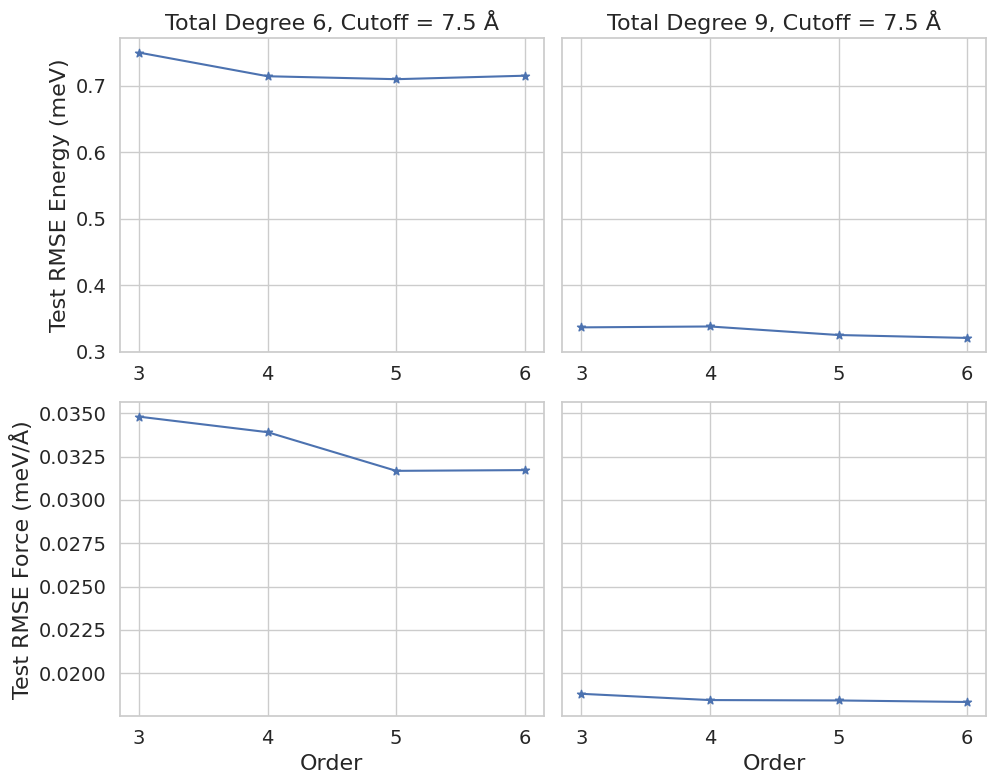

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# ---------------------------------------------------
# Load and filter data
# ---------------------------------------------------
df = pd.read_csv("resultsmix_RRQR.csv")  # <--- update filename if needed

td1 = 6
td2 = 9
r_cut = 7.5

df45 = df[df['rcut'] == r_cut]
deg9  = df45[df45['totaldegree'] == td1].sort_values('order')
deg12 = df45[df45['totaldegree'] == td2].sort_values('order')

# ---------------------------------------------------
# 2x2 subplot figure
# ---------------------------------------------------
fig, axes = plt.subplots(2, 2, figsize=(10, 8), sharey='row')

# ------------------------
# Row 1: Energy RMSE
# ------------------------
axes[0, 0].scatter(deg9['order'], deg9['test_rmse_E'], marker='*')
axes[0, 0].plot(deg9['order'], deg9['test_rmse_E'])
axes[0, 0].set_title(f'Total Degree {td1}, Cutoff = {r_cut} Å', fontsize=16)
#axes[0, 0].set_xlabel("Order", fontsize=16)
axes[0, 0].set_ylabel("Test RMSE Energy (meV)", fontsize=16)
axes[0, 0].set_xticks([3, 4, 5, 6])
axes[0, 0].tick_params(axis='both', labelsize=14)

axes[0, 1].scatter(deg12['order'], deg12['test_rmse_E'], marker='*')
axes[0, 1].plot(deg12['order'], deg12['test_rmse_E'])
axes[0, 1].set_title(f'Total Degree {td2}, Cutoff = {r_cut} Å', fontsize=16)
#axes[0, 1].set_xlabel("Order", fontsize=16)
axes[0, 1].set_xticks([3, 4, 5, 6])
axes[0, 1].tick_params(axis='both', labelsize=14)

# ------------------------
# Row 2: Force RMSE
# ------------------------
axes[1, 0].scatter(deg9['order'], deg9['test_rmse_F'], marker='*')
axes[1, 0].plot(deg9['order'], deg9['test_rmse_F'])
axes[1, 0].set_xlabel("Order", fontsize=16)
axes[1, 0].set_ylabel("Test RMSE Force (meV/Å)", fontsize=16)
axes[1, 0].set_xticks([3, 4, 5, 6])
axes[1, 0].tick_params(axis='both', labelsize=14)

axes[1, 1].scatter(deg12['order'], deg12['test_rmse_F'], marker='*')
axes[1, 1].plot(deg12['order'], deg12['test_rmse_F'])
axes[1, 1].set_xlabel("Order", fontsize=16)
axes[1, 1].set_xticks([3, 4, 5, 6])
axes[1, 1].tick_params(axis='both', labelsize=14)

# ---------------------------------------------------
plt.tight_layout()
fig.savefig("effect_order_RMSE_scatter.png", dpi=300, bbox_inches="tight")
plt.show()


## Figure 3.3
**Effect of total degree on test RMSE for energy and force predictions**

/tmp/ipython-input-1395343236.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="totaldegree", y="test_rmse_E", palette="Set3", ax=axes[0], showfliers=False)
/tmp/ipython-input-1395343236.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="totaldegree", y="test_rmse_F", palette="Set3", ax=axes[1], showfliers=False)


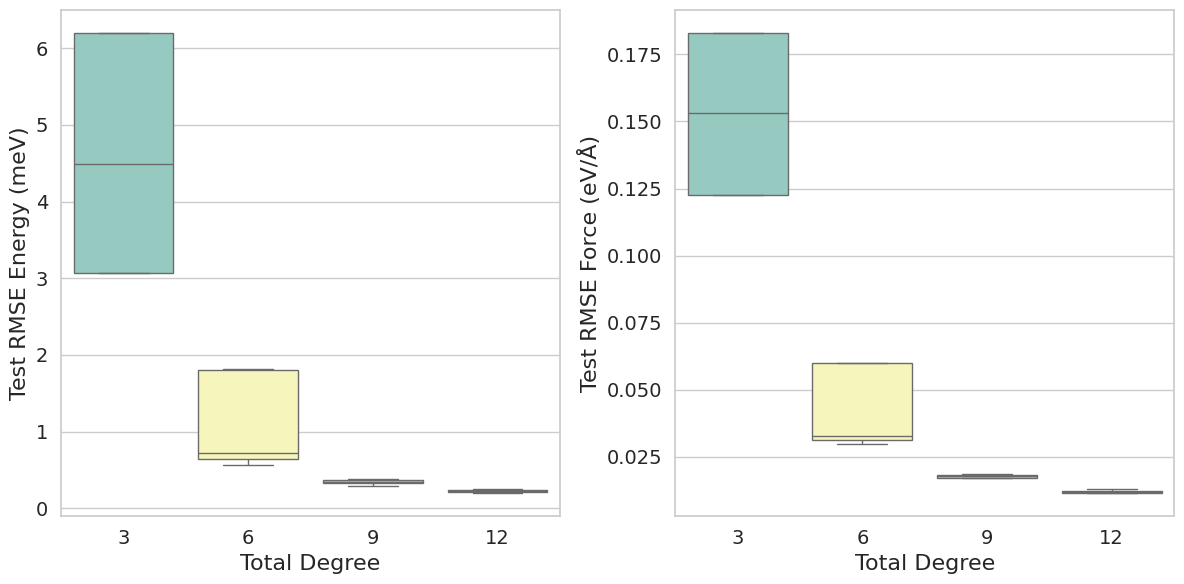

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
file_path = "resultsmix_RRQR.csv"
df = pd.read_csv(file_path)

# Set style
sns.set(style="whitegrid", context="notebook")


# ----------------------------
# Effect of Total Degree
# ----------------------------
fig, axes = plt.subplots(1, 2, figsize=(12,6))

sns.boxplot(data=df, x="totaldegree", y="test_rmse_E", palette="Set3", ax=axes[0], showfliers=False)
#sns.stripplot(data=df, x="totaldegree", y="test_rmse_E", color="black", alpha=0.5, ax=axes[0])
axes[0].set_xlabel("Total Degree", fontsize=16)
axes[0].set_ylabel("Test RMSE Energy (meV)", fontsize=16)
axes[0].tick_params(axis='both', which='major', labelsize=14)


sns.boxplot(data=df, x="totaldegree", y="test_rmse_F", palette="Set3", ax=axes[1], showfliers=False)
#sns.stripplot(data=df, x="totaldegree", y="test_rmse_F", color="black", alpha=0.5, ax=axes[1])
axes[1].set_xlabel("Total Degree", fontsize=16)
axes[1].set_ylabel("Test RMSE Force (eV/Å)", fontsize=16)
axes[1].tick_params(axis='both', which='major', labelsize=14)


plt.tight_layout()
fig.savefig("effect_totaldegree_energy_force_RMSE.png", dpi=300, bbox_inches="tight")
plt.show()

## Figure 3.4
**Effect of cutoff radius on test RMSE for energy and force**

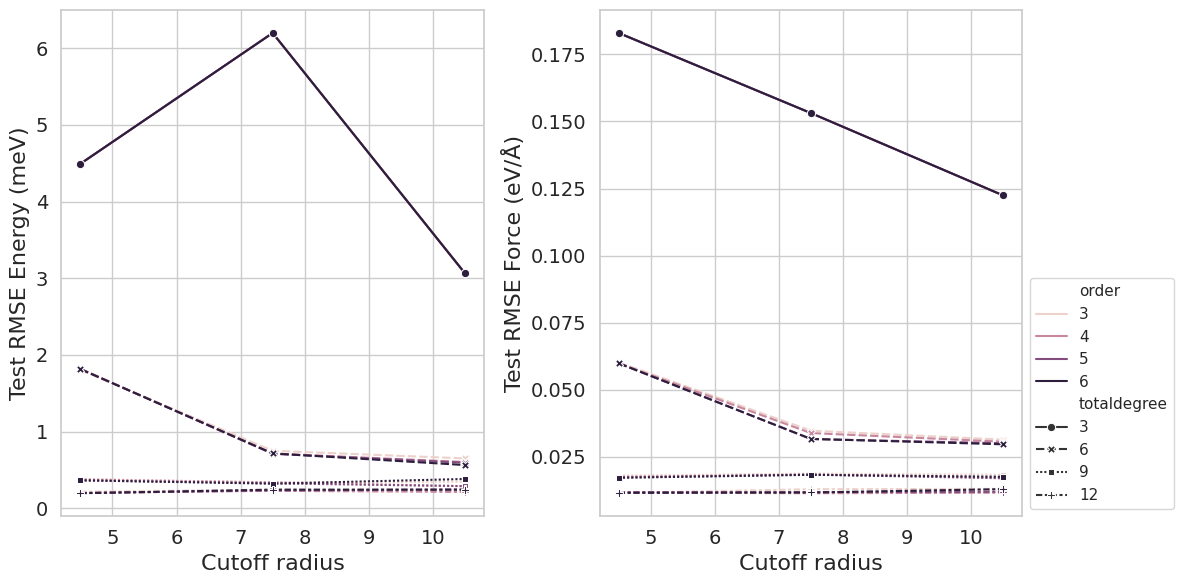

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
file_path = "resultsmix_RRQR.csv"
df = pd.read_csv(file_path)

# Set style
sns.set(style="whitegrid", context="notebook")


# ----------------------------
# Effect of rcut
# ----------------------------
fig, axes = plt.subplots(1, 2, figsize=(12,6))

sns.lineplot(data=df, x="rcut", y="test_rmse_E", hue="order", style="totaldegree", markers=True, ax=axes[0])
axes[0].set_xlabel("Cutoff radius", fontsize=16)
axes[0].set_ylabel("Test RMSE Energy (meV)", fontsize=16)
axes[0].tick_params(axis='both', which='major', labelsize=14)
axes[0].get_legend().remove()


sns.lineplot(data=df, x="rcut", y="test_rmse_F", hue="order", style="totaldegree", markers=True, ax=axes[1])
axes[1].set_xlabel("Cutoff radius", fontsize=16)
axes[1].set_ylabel("Test RMSE Force (eV/Å)", fontsize=16)
axes[1].tick_params(axis='both', which='major', labelsize=14)
axes[1].get_legend().remove()


axes[1].legend(bbox_to_anchor=(1, -0.001), loc="lower left")

plt.tight_layout()
fig.savefig("effect_rcut_energy_force_RMSE.png", dpi=300, bbox_inches="tight")
plt.show()

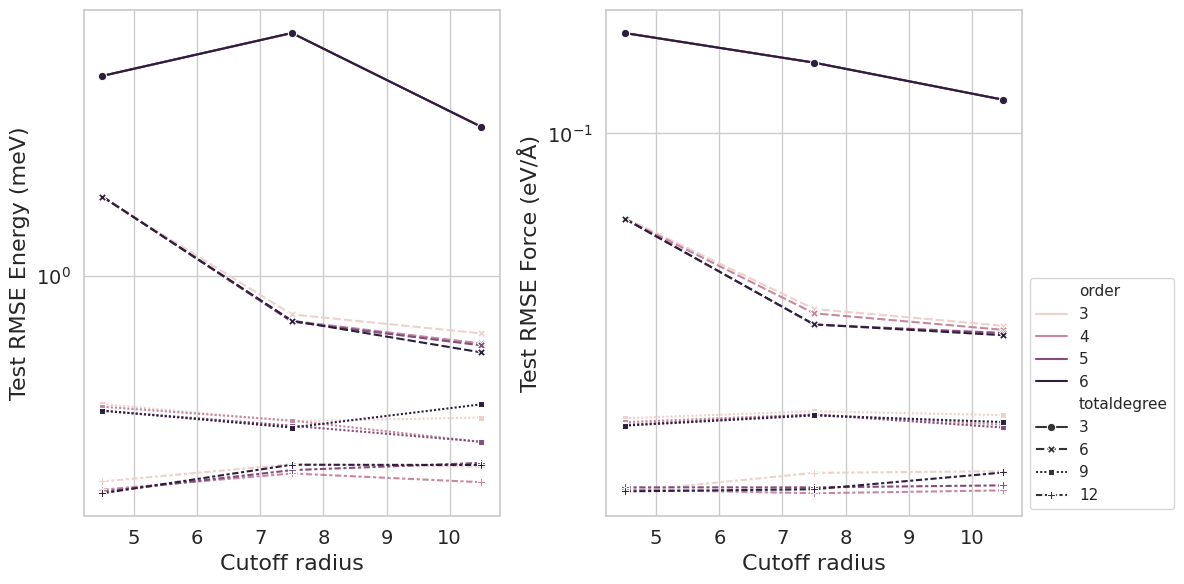

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
file_path = "resultsmix_RRQR.csv"
df = pd.read_csv(file_path)

# Set style
sns.set(style="whitegrid", context="notebook")


# ----------------------------
# Effect of rcut
# ----------------------------
fig, axes = plt.subplots(1, 2, figsize=(12,6))

sns.lineplot(data=df, x="rcut", y="test_rmse_E", hue="order", style="totaldegree", markers=True, ax=axes[0])
axes[0].set_xlabel("Cutoff radius", fontsize=16)
axes[0].set_ylabel("Test RMSE Energy (meV)", fontsize=16)
axes[0].tick_params(axis='both', which='major', labelsize=14)
axes[0].set_yscale("log")
axes[0].get_legend().remove()


sns.lineplot(data=df, x="rcut", y="test_rmse_F", hue="order", style="totaldegree", markers=True, ax=axes[1])
axes[1].set_xlabel("Cutoff radius", fontsize=16)
axes[1].set_ylabel("Test RMSE Force (eV/Å)", fontsize=16)
axes[1].tick_params(axis='both', which='major', labelsize=14)
axes[1].set_yscale("log")
axes[1].get_legend().remove()


axes[1].legend(bbox_to_anchor=(1, -0.001), loc="lower left")

plt.tight_layout()
fig.savefig("effect_rcut_energy_force_RMSE_log.png", dpi=300, bbox_inches="tight")
plt.show()

# Figure 3.5
**Plot RMSE and MAE from selected model**

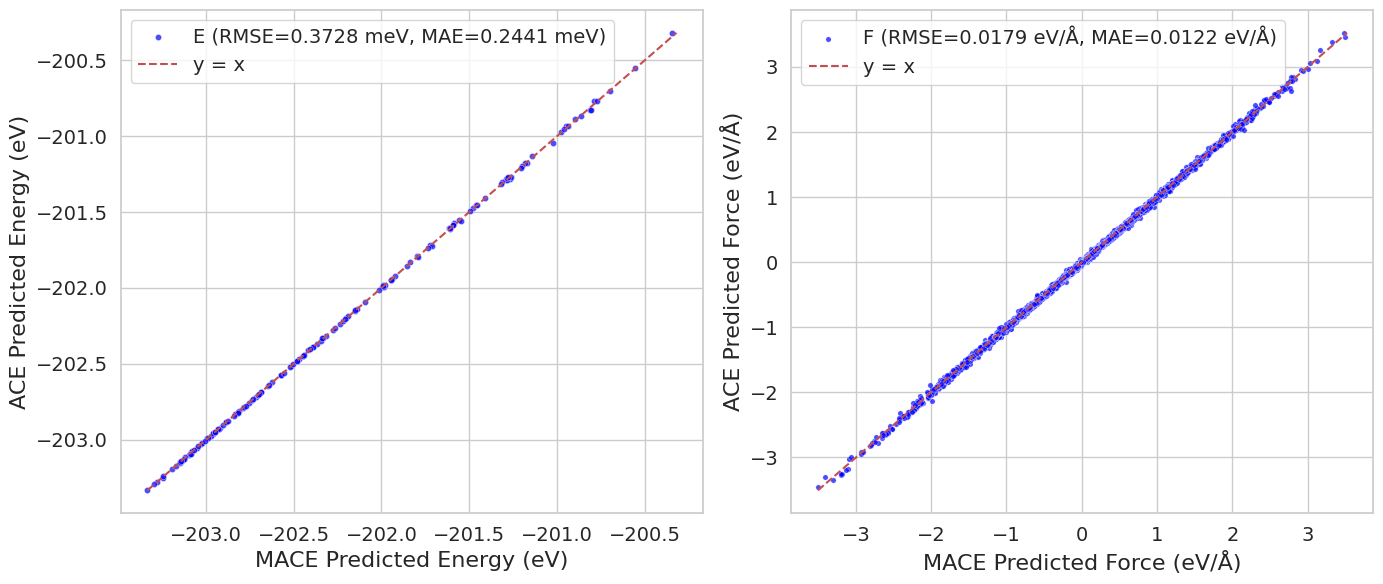

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style
sns.set(style="whitegrid", context="notebook")

# -------------------
# ENERGY PLOT
# -------------------
df_energy = pd.read_csv("_energy.csv")

# Calculate RMSE & MAE (per atom error column already in CSV)
rmseE = np.sqrt(np.mean(df_energy["dE_per_atom"]**2)) * 1000  # meV/atom
maeE = np.mean(np.abs(df_energy["dE_per_atom"])) * 1000      # meV/atom

# -------------------
# FORCE PLOT
# -------------------
df_force = pd.read_csv("_forces.csv")

# Calculate RMSE & MAE
rmseF = np.sqrt(np.mean(df_force["dF"]**2))
maeF = np.mean(np.abs(df_force["dF"]))

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6)) # 1 row, 2 columns

# Plot Energy
sns.scatterplot(
    data=df_energy,
    x="E_ref",
    y="E_pred",
    s=20,
    color="blue",
    alpha=0.7,
    label=f"E (RMSE={rmseE:.4f} meV, MAE={maeE:.4f} meV)",
    ax=axes[0] # Plot on the first subplot
)
# Add y = x line for Energy
lims_energy = [
    min(df_energy["E_ref"].min(), df_energy["E_pred"].min()),
    max(df_energy["E_ref"].max(), df_energy["E_pred"].max())
]
axes[0].plot(lims_energy, lims_energy, 'r--', label="y = x")
axes[0].set_xlabel("MACE Predicted Energy (eV)", fontsize=16)
axes[0].set_ylabel("ACE Predicted Energy (eV)", fontsize=16)
#axes[0].set_title("BCC crystal of 16 atoms W — Energy")
axes[0].tick_params(axis="both", which="major", labelsize=14)
axes[0].legend(loc="upper left", fontsize=14)


# Plot Force
sns.scatterplot(
    data=df_force,
    x="F_ref",
    y="F_pred",
    s=15,
    color="blue",
    alpha=0.7,
    label=f"F (RMSE={rmseF:.4f} eV/Å, MAE={maeF:.4f} eV/Å)",
    ax=axes[1] # Plot on the second subplot
)
# Add y = x line for Force
lims_force = [
    min(df_force["F_ref"].min(), df_force["F_pred"].min()),
    max(df_force["F_ref"].max(), df_force["F_pred"].max())
]
axes[1].plot(lims_force, lims_force, 'r--', label="y = x")
axes[1].set_xlabel("MACE Predicted Force (eV/Å)", fontsize=16)
axes[1].set_ylabel("ACE Predicted Force (eV/Å)", fontsize=16)
#axes[1].set_title("BCC crystal of 16 atoms W — Force")
axes[1].tick_params(axis="both", which="major", labelsize=14)
axes[1].legend(loc="upper left", fontsize=14)

plt.tight_layout()
plt.savefig("energy_forces_scatter.png", dpi=300, bbox_inches="tight")
plt.show()

# Figure 3.6
**Plot speed comparison (ACE vs. MACE)**

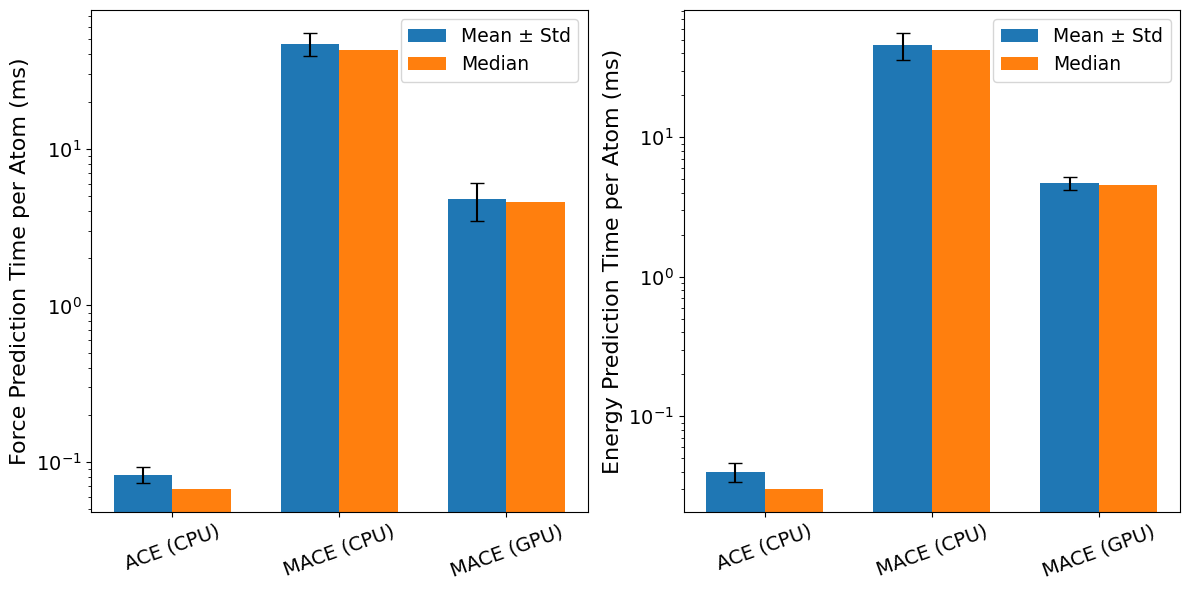

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------
# Data
# -----------------------------
models = ["ACE (CPU)", "MACE (CPU)", "MACE (GPU)"]

# Force prediction times (ms per atom)
force_means = [0.083, 47, 4.75]
force_medians = [0.067, 43, 4.55]
force_stds = [0.01, 8, 1.3]

# Energy prediction times (ms)
energy_means = [0.04, 46, 4.68]
energy_medians = [0.03, 42, 4.55]
energy_stds = [0.006, 10, 0.49]

# X locations
x = np.arange(len(models))
width = 0.35

# -----------------------------
# Plot
# -----------------------------
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Force subplot
axes[0].bar(x - width/2, force_means, width,
            yerr=force_stds, capsize=5, label="Mean ± Std")
axes[0].bar(x + width/2, force_medians, width, label="Median")
axes[0].set_xticks(x)
axes[0].set_xticklabels(models, rotation=20)
axes[0].set_ylabel("Force Prediction Time per Atom (ms)", fontsize=16)
#axes[0].set_title("Force Prediction Speed Comparison")
axes[0].tick_params(axis='both', which='major', labelsize=14)
axes[0].set_yscale("log")   # <-- log scale
axes[0].legend(fontsize=13.5)

# Energy subplot
axes[1].bar(x - width/2, energy_means, width,
            yerr=energy_stds, capsize=5, label="Mean ± Std")
axes[1].bar(x + width/2, energy_medians, width, label="Median")
axes[1].set_xticks(x)
axes[1].set_xticklabels(models, rotation=20)
axes[1].set_ylabel("Energy Prediction Time per Atom (ms)", fontsize=16)
#axes[1].set_title("Energy Prediction Speed Comparison")
axes[1].tick_params(axis='both', which='major', labelsize=14)
axes[1].set_yscale("log")   # <-- log scale
axes[1].legend(fontsize=13.5)

plt.tight_layout()
plt.savefig("ACE_MACE_timing_log.png", dpi=300, bbox_inches="tight")
plt.show()
